In [15]:
!pip install refractio[snowflake]
!pip install scikit-learn 
!pip install matplotlib
!pip install statsmodels
!pip install pmdarima
!pip install fosforml

You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.
     |████████████████████████████████| 40kB 5.1MB/s eta 0:00:011
     |████████████████████████████████| 10.9MB 43.6MB/s eta 0:00:01
     |████████████████████████████████| 1.9MB 78.3MB/s eta 0:00:01
     |████████████████████████████████| 1.3MB 63.1MB/s eta 0:00:01
     |████████████████████████████████| 200.3MB 94kB/s /s eta 0:00:01███                | 99.8MB 85.0MB/s eta 0:00:02�████████▌           | 128.0MB 112.4MB/s eta 0:00:01█████▏        | 145.1MB 112.4MB/s eta 0:00:01
     |████████████████████████████████| 98.2MB 231kB/s  eta 0:00:01��██████████   | 89.3MB 80.1MB/s eta 0:00:01
     |████████████████████████

In [19]:
pip install --upgrade pip

     |████████████████████████████████| 1.8MB 8.1MB/s eta 0:00:01
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
Note: you may need to restart the kernel to use updated packages.


In [16]:
## Step 1. Connecting to the Snowflake Connection specified in Insight Designer Module

In [21]:
from fosforml.model_manager.snowflakesession import get_session
my_session = get_session()

In [9]:
### (i) Getting dataset from Insight Designer

In [22]:
table_name = 'PHARMACEUTICAL_BRAND'

In [23]:
table_name

'PHARMACEUTICAL_BRAND'

In [25]:
sf_df = my_session.sql("select * from {}".format(table_name))
dataset = sf_df.to_pandas()

In [27]:
## Step 2. Exploratory Data Analysis (EDA)

In [29]:
## Checking TRx trend for GAMMATEX brand
## Plot shows various highs and lows but yearly essence of TRx shows an upward trend.

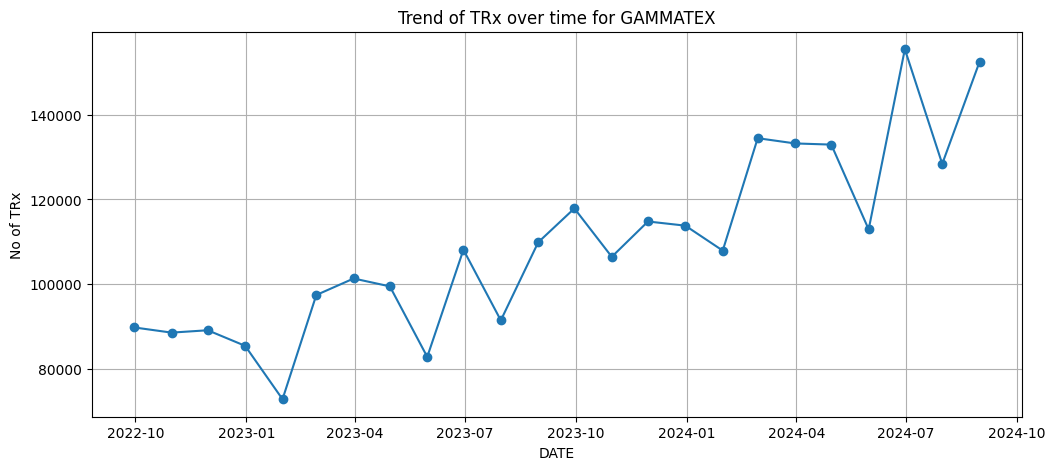

In [30]:
import matplotlib.pyplot as plt #importing pandas and matplotlib library.
import pandas as pd
gammatex_data = dataset[dataset['BRAND']=='GAMMATEX'] #to read the dataset where brand is GAMMATEX
gammatex_data.loc[:,'DATE'] = pd.to_datetime(gammatex_data.loc[:,'DATE']) #To DATETIME format conversion for python to understand
monthly_data = gammatex_data.resample('M', on='DATE').sum() #Aggregation of data to Monthly data by adding all values. 
plt.figure(figsize = (12,5)) #visualisation
plt.plot(monthly_data.index , monthly_data['TRX'],  marker='o',  linestyle = '-')
plt.title('Trend of TRx over time for GAMMATEX')
plt.xlabel('DATE')
plt.ylabel('No of TRx')
plt.grid(True)
plt.show()

In [31]:
## Checking TRx trend for DELTAZYME brand
## Plot shows various highs and lows but yearly essence of TRx shows an downward trend.

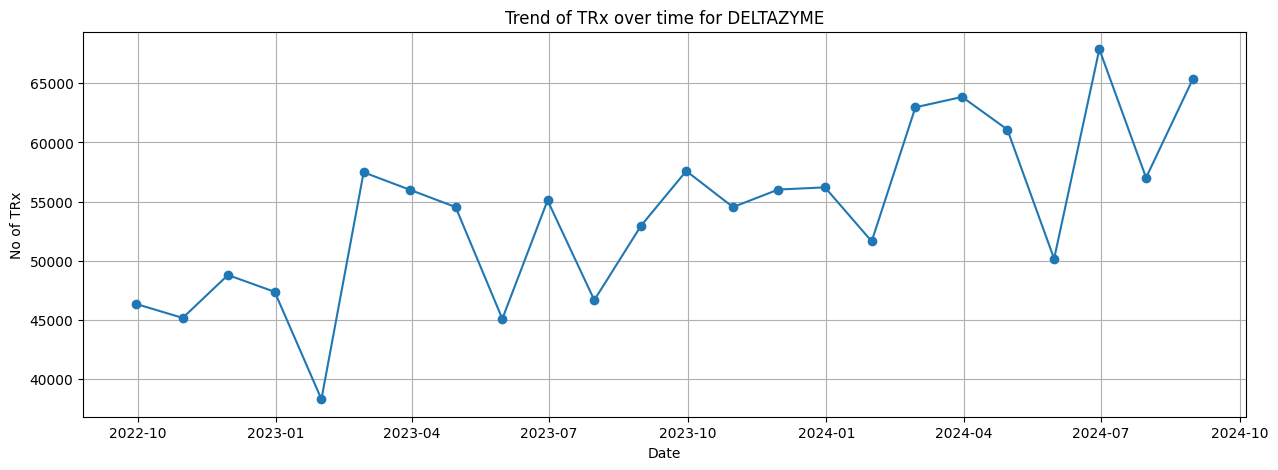

In [32]:
import matplotlib.pyplot as plt
deltazyme_data = dataset[dataset['BRAND']=='DELTAZYME']
deltazyme_data.loc[:,'DATE'] = pd.to_datetime(deltazyme_data.loc[:,'DATE'])
monthly_data = deltazyme_data.resample('M', on='DATE').sum()
plt.figure(figsize = (15,5))
plt.plot(monthly_data.index , monthly_data['TRX'],  marker='o',  linestyle = '-')
plt.title('Trend of TRx over time for DELTAZYME')
plt.xlabel('Date')
plt.ylabel('No of TRx')
plt.grid(True)
plt.show()

In [35]:
##Exploring the region-wise trends for all the brands

In [36]:
##Total Prescriptions were added after grouping them by brand and region wise. We came up with a list of unique Brands (4) and unique Regions (7) to Plot the trends which include 28 Subplots

In [ ]:
dataset['DATE'] = pd.to_datetime(dataset['DATE'])
grouped_data = dataset.groupby(['BRAND' , 'REGION', pd.Grouper(key = 'DATE', freq= 'M')]).sum().reset_index()
region_list = grouped_data['REGION'].unique()
brand_list = grouped_data['BRAND'].unique()
fig1,axs1 = plt.subplots(len(region_list), 2 , figsize = (20,20), sharey=True)
fig1.suptitle('Trend over time for diffrent Region and Brand')

for i, region in enumerate(region_list):
    for j, brand in enumerate(brand_list[:2]):
        region_brand_data = grouped_data[(grouped_data['REGION']== region) & (grouped_data['BRAND'] == brand)]
        axs1[i,j].plot(region_brand_data['DATE'], region_brand_data['TRX'] , marker='o' , linestyle='-')
        axs1[i,j].set_title(f'REGION: {region}, BRAND: {brand}')
        axs1[i,j].set_xlable = ('Time')
        axs1[i,j].set_ylable = ('No of TRx')
        axs1[i,j].grid(True)
plt.tight_layout()
plt.show()
fig2,axs2 = plt.subplots(len(region_list), 2 , figsize = (20,20), sharey=True)
fig2.suptitle('Trend over time for diffrent Region and Brand')
for i, region in enumerate(region_list):
    for j, brand in enumerate(brand_list[2:]):
        region_brand_data = grouped_data[(grouped_data['REGION']== region) & (grouped_data['BRAND'] == brand)]
        axs2[i,j].plot(region_brand_data['DATE'], region_brand_data['TRX'] , marker='o' , linestyle='-')
        axs2[i,j].set_title(f'REGION: {region}, BRAND: {brand}')
        axs2[i,j].set_xlable = ('Time')
        axs2[i,j].set_ylable = ('No of TRx')
        axs2[i,j].grid(True)
plt.tight_layout()
plt.show()